## This aim of this notebook is to find the effect of snowfall on TTC delay patterns

### First, let's load and sort our weather (precipitation, snow) data

In [53]:
import pandas as pd
import matplotlib
import requests
import json
import csv

source = "weather_data/weatherstats_toronto_daily.csv"

weather_df = pd.read_csv(source)

In [55]:
df = weather_df[['date', 'snow', 'precipitation']]

# Convert date column into datetime format
weather_df['date'] = pd.to_datetime(df.date)
weather_df = weather_df.sort_values('date')
weather_df = weather_df.set_index('date')

/home/alok/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


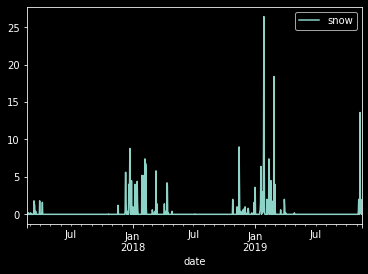

In [67]:
weather_df.plot(y='snow')

### What was the day with the most amount of snow?

In [69]:
weather_df.snow.idxmax()
weather_df.loc['2019-01-28']

snow             26.4
precipitation    19.6
Name: 2019-01-28 00:00:00, dtype: float64

## Second, let's load the TTC delay data

In [76]:
source_2 = 'ttc_data/streetcar_delay_2018.csv'

streetcar_df = pd.read_csv(source_2)
streetcar_df['Report Date'] = pd.to_datetime(streetcar_df['Report Date'])
streetcar_df = streetcar_df[['Report Date', 'Min Delay']]

In [78]:
streetcar_df.head(20)

,Report Date,Min Delay
0,2018-12-01,10.0
1,2018-12-01,35.0
2,2018-12-01,30.0
3,2018-12-01,10.0
4,2018-12-01,6.0
5,2018-12-01,18.0
6,2018-12-01,6.0
7,2018-12-01,6.0
8,2018-12-01,5.0
9,2018-12-01,6.0


In [80]:
# This groups the data frame by date and adds everything in the group
sc_group = streetcar_df.groupby(['Report Date']).sum()

In [81]:
sc_group

,Min Delay
Report Date,
2018-01-01,779.0
2018-01-02,750.0
2018-01-03,715.0
2018-01-04,595.0
2018-01-05,1077.0
...,...
2018-12-27,254.0
2018-12-28,724.0
2018-12-29,231.0
